In [109]:
##### Base ###
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

##### Decision Tree ###
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff

##### In più ###
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from collections import Counter
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from imblearn.datasets import make_imbalance

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

## Altri###
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
import time
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
import scikitplot as skplt
import seaborn as sns

# Caricare il dataset

## Caricare dataset v1

In [110]:
train = pd.read_csv('../data/csv_files/train.csv')
X_train = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_train = train['Activity']


In [111]:
test = pd.read_csv('../data/csv_files/test.csv')
X_test = test.drop(['subject', 'Activity','ActivityName'], axis=1)
y_test = test['Activity']

### Caricamento funzione grid search

In [224]:
def grid_imbalanced(model, k_neighbors, sampling_strategy, cnn = False):
    Acc_list = []
    
    for k in k_neighbors:
        #print('numero vicini: %s' % k)
        if cnn:
            method = model(random_state=42, n_jobs=10, sampling_strategy=sampling_strategy, n_neighbors = k)
        else:
            method = model(random_state=42, n_jobs=10, sampling_strategy=sampling_strategy, k_neighbors = k)

        X_res, y_res = method.fit_resample(X_train, y_train)
        #print('Resampled dataset shape %s' % Counter(y_res))
        #pca = PCA(n_components=2)
        #pca.fit(X_train)
        #X_pca = pca.transform(X_res)

        #plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
        #plt.show()

        clf = DecisionTreeClassifier( random_state=42)
        clf.fit(X_res, y_res)

        y_pred = clf.predict(X_test)

        #print('n vicini: %s' % k)
        #print('---Accuracy %s' % accuracy_score(y_test, y_pred))
        Acc_list.append(accuracy_score(y_test, y_pred))
        #print('---F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
        #print('-------------------------')
        #print(classification_report(y_test, y_pred))
    plt.plot(k_neighbors, Acc_list, marker = "o", color = 'blue')
    plt.title("Accuracies at different number of neighbors")
    plt.xlabel("Number of neighbors") 
    plt.ylabel("Accuracy")
    plt.show()

### Caricamento funzioni DT e KNN

In [215]:
n_iter = 10
scoring = 'f1_weighted'
random_state = 42

# test_n_splits = 9
test_n_splits = 3

# Parametri globali DT
DT = DecisionTreeClassifier(random_state=42)
model_name = "DecisionTreeClassifier"

v_or_t_flag = "TST"
cmap = plt.cm.Blues
color = "blue"

# Parametri globali KNN
KNN = KNeighborsClassifier()




    # parametri dal report
DT_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,4,6,8,9,10], #+ list(np.arange(1, len(X_train.columns) + 1, 100)),
    'min_samples_leaf': [2, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    #'max_features': ['auto']

    #'class_weight': ['balanced', None, {0: 0.1, 1: 0.3, 2: 0.6}]
}

sqrt_records = round(math.sqrt(X_train.shape[1]))
k_range = list(range(2, sqrt_records+1, 2))
KNN_params = {
    'n_neighbors': k_range,
    'weights': ['uniform', 'distance']
}

def draw_roc_curve_mutliclass(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    lb.classes_.tolist()

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    by_test = lb.transform(y_test)
    by_pred = lb.transform(y_pred)
    for i in range(6):
        fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    roc_auc = roc_auc_score(by_test, by_pred, average=None)
    plt.figure(figsize=(8, 5))
    
    for i in range(6):
        plt.plot(fpr[i], tpr[i], 
                 label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20) 
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.show()
    
def plot_learning_curve(pipeline, X, y, scorer='accuracy', cv=5, train_sizes=np.linspace(.1, 1.0, 5), 
                        shuffle=False, random_state=None):

    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, train_sizes=train_sizes, cv=cv,
                                                            scoring=scorer, n_jobs=-1, shuffle=shuffle,
                                                            random_state=random_state)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title('learning curve')
    plt.xlabel('training set size')
    plt.ylabel('score')

    plt.plot(train_sizes, mean_train_score, label='train score', color='navy', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_train_score + std_train_score,
                     mean_train_score - std_train_score, color='navy', alpha=0.2)
    plt.plot(train_sizes, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_test_score + std_test_score,
                     mean_test_score - std_test_score, color='darkorange', alpha=0.2)

    plt.legend(loc='lower right').get_frame().set_facecolor('white')
    
def get_tuned_model(X_tr, y_tr, params):
    
    model_params = list(model_grid(X_tr).keys())
    # retrieve best hyperameters
    tmp_model_hyperparameters = dict((k, params[k]) for k in model_params if k in params)
    model_hyperparameters = {}
    for key, value in tmp_model_hyperparameters.items():
        key = key.split('model__')[1].replace("'", "")
        model_hyperparameters[key] = value
        
    tuned_model =  model.set_params(**model_hyperparameters)
    tuned_model.fit(X_tr, y_tr.values.ravel())
    return tuned_model

def plot_confusion_matrix(cm, classes, normalize):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("%s\'s %s classification report" % (model_name.capitalize(), v_or_t_flag.upper()))
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def plot_classification_report(y_ts, y_pred):
    model_report = classification_report(y_ts, 
                                       y_pred,
                                       # target_names=['Studio Recording', 'Live Recording'],
                                       output_dict=True)
    model_r = pd.DataFrame(model_report).iloc[:-1, :].T
    sns.heatmap(model_r, annot=True, cmap=cmap, cbar=False)
    plt.title("%s\'s %s confusion matrix" % (model_name.capitalize(), v_or_t_flag.upper()))
    plt.show()
    
def plot_decision_boundary(X_tr, y_tr, model):
    pca = PCA(n_components=2)
    best_visualisation_scaler = StandardScaler()
    scaled_X_tr = best_visualisation_scaler.fit_transform(X_tr)
    X = pca.fit_transform(scaled_X_tr)
    # X = pca.fit_transform(X_tr)
    y = y_tr.values.ravel()

    model.fit(X, y)
    plt.figure(figsize=(8, 5))
    fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
    plt.xlabel("PCA component 1")
    plt.ylabel("PCA component 2")
    plt.title("%s's %s decision boundary" % (model_name, v_or_t_flag))
    plt.legend(loc='best')
    plt.grid(False)
    plt.show()




def tune_model(model, params, X_train, y_train, X_test,y_test):
    k_fold = StratifiedKFold(n_splits=3) 
    grid_search = GridSearchCV(model, params, n_jobs = -1, verbose =3, cv = k_fold, refit = 'f1_weighted')
    grid_search.fit(X_train, y_train.values.ravel())

    print()
    print(grid_search.best_params_)
    print(grid_search.best_estimator_)
    print()

    best_params = grid_search.best_params_
    clf = grid_search.best_estimator_

    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)
    #tuned_model = get_tuned_model(X_train, y_train, best_params)

    # Prima visualizzazione
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
    print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', metrics.recall_score(y_test, y_pred, average='weighted'))

    print(classification_report(y_test, y_pred))

    # Seconda visualizzazione
    print("\n=== CROSS VALIDATION SCORES ===")
    scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=10)
    print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))
    scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=10, scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))


    #print("\n=== CONFUSION MATRIX ===")
    #cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) # cmap=cmap
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

    #disp.plot()                      
    #metrics.plot_confusion_matrix(clf, X_test, y_test)
    #plt.show()


    #print("\n=== Altre grafiche per visualizzazione===")
    cm = confusion_matrix(y_test, y_pred)
    #plot_confusion_matrix(cm, clf.classes_, True)
    plot_classification_report(y_test, y_pred)

    #plot_decision_boundary(X_train, y_train, tuned_model)  # passing random scaler

    #draw_roc_curve_mutliclass(y_test, y_pred)

    #print("\n=== CURVES===")
    #skplt.metrics.plot_roc(y_test, y_score)

    #plot_precision_recall(y_test, y_score)
    plt.show()


### Sbilanciare il dataset (WALKING DOWN & LAYING)

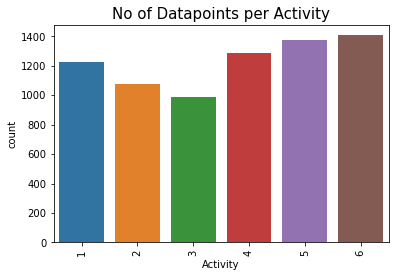

In [114]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(y_train)
plt.xticks(rotation=90)
plt.show()

In [115]:
print('WALKING (1): \t \t ',len(y_train[y_train == 1]))
print('WALKING up (2): \t ',len(y_train[y_train == 2]))
print('WALKING down (3): \t ',len(y_train[y_train == 3]))

print('SITTING (4): \t \t ',len(y_train[y_train == 4]))
print('STANDING(5): \t \t',len(y_train[y_train == 5]))
print('LAYING (6): \t \t',len(y_train[y_train == 6]))

WALKING (1): 	 	  1226
WALKING up (2): 	  1073
WALKING down (3): 	  986
SITTING (4): 	 	  1286
STANDING(5): 	 	 1374
LAYING (6): 	 	 1407


In [116]:
# ottengo gli id delle dei dati con activity == 3 (RIDUZIONE WALKING DOWN) e activity == 6 (RIDUZIONE LAYING)
def selezione_righe(y, activity, perc):
    df = y_train[y_train == activity]
    lista_righe = df[:perc].index.tolist()
    print('selezione di ',len(lista_righe), 'righe')
    return lista_righe

In [117]:
y_train.shape

(7352,)

In [118]:
# n dati per walking_down prima del drop
print('shape prima del drop: ', y_train[y_train ==3].shape)

# riduzione del 90% == 887
lista_righe = selezione_righe(y_train,3,887)
# elimino i dati per sbilanciare
X_train.drop(lista_righe,axis=0,inplace=True)
y_train.drop(lista_righe,axis=0,inplace=True)

# n dati  dopo il  drop
print('shape dopo il drop: ', y_train[y_train ==3].shape)

shape prima del drop:  (986,)
selezione di  887 righe
shape dopo il drop:  (99,)


In [119]:
y_train.shape

(6465,)

In [120]:
# n dati per laying prima del drop
print('shape prima del drop: ', y_train[y_train == 6].shape)

# riduzione del 90% == 1266
lista_righe = selezione_righe(y_train,6,1266)
# elimino i dati per sbilanciare
X_train.drop(lista_righe,axis=0,inplace=True)
y_train.drop(lista_righe,axis=0,inplace=True)

# n dati  dopo il  drop
print('shape dopo il drop: ', y_train[y_train == 6].shape)

shape prima del drop:  (1407,)
selezione di  1266 righe
shape dopo il drop:  (141,)


In [121]:
y_train.shape

(5199,)

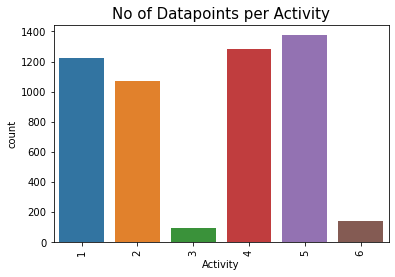

In [122]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(y_train)
plt.xticks(rotation=90)
plt.show()

# Decision tree

Fitting 3 folds for each of 126 candidates, totalling 378 fits

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

Accuracy 0.7482185273159145
F1-score 0.7251829501557686
Precision: 0.7593786999092913
Recall: 0.7482185273159145
              precision    recall  f1-score   support

           1       0.67      0.93      0.78       496
           2       0.62      0.80      0.70       471
           3       0.70      0.18      0.28       420
           4       0.80      0.77      0.78       491
           5       0.73      0.83      0.78       532
           6       1.00      0.88      0.94       537

    accuracy                           0.75      2947
   macro avg       0.75      0.73      0.71      2947
weighted avg       0.76      0.75      0.73      2947


=== CROSS VALIDATION SCORES ===
Accuracy: 0.8606 (+/- 0.070)
F1-score: 

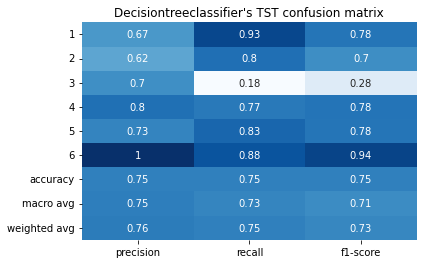

In [238]:
#y_train_DT = pd.DataFrame(y_train)
tune_model(DT, DT_params, X_train, y_train, X_test, y_test)

## Grid search imbalanced

# Undersampling

Due tecniche:
- Random undersampling: riduce la classe maggioritaria in maniera casuale
- Condensed Nearest neighbor: si basa sul concetto del vicinato (KNN) 

## RandomUnderSampler

In [125]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.tree import DecisionTreeClassifier

#### Test different sampling_strategy

- 'majority': resample only the majority class;

- 'not minority': resample all classes but the minority class;

- 'not majority': resample all classes but the majority class;

- 'all': resample all classes;


Resampled dataset shape Counter({4: 1286, 1: 1226, 2: 1073, 6: 141, 3: 99, 5: 99})


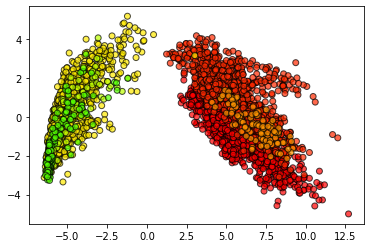

tipo di sampling_strategy: majority
---Accuracy 0.7183576518493383
---F1-score 0.7058777665477265
-------------------------
Resampled dataset shape Counter({1: 99, 2: 99, 3: 99, 4: 99, 5: 99, 6: 99})


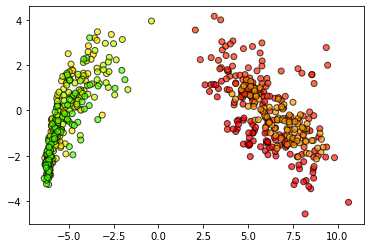

tipo di sampling_strategy: not minority
---Accuracy 0.7390566677977605
---F1-score 0.723331301381196
-------------------------
Resampled dataset shape Counter({5: 1374, 1: 99, 2: 99, 3: 99, 4: 99, 6: 99})


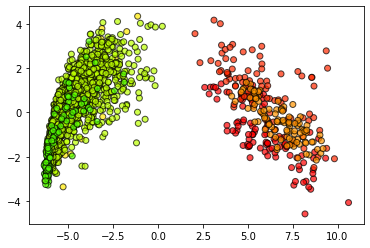

tipo di sampling_strategy: not majority
---Accuracy 0.7268408551068883
---F1-score 0.7119873458770433
-------------------------
Resampled dataset shape Counter({1: 99, 2: 99, 3: 99, 4: 99, 5: 99, 6: 99})


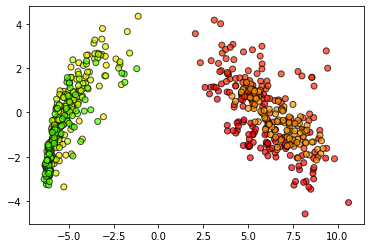

tipo di sampling_strategy: all
---Accuracy 0.7563624024431626
---F1-score 0.7456874251513451
-------------------------


In [138]:
sampling_strategy = ['majority', 'not minority', 'not majority', 'all'] 
Acc_list = []


for s in sampling_strategy:
    rus = RandomUnderSampler(random_state=42, sampling_strategy=s)
    X_res, y_res = rus.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_res))
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_pca = pca.transform(X_res)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

    clf = DecisionTreeClassifier( random_state=42)
    clf.fit(X_res, y_res)

    y_pred = clf.predict(X_test)
    print('tipo di sampling_strategy: %s' % s)
    print('---Accuracy %s' % accuracy_score(y_test, y_pred))
    Acc_list.append(accuracy_score(y_test, y_pred))
    print('---F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
    print('-------------------------')
    #print(classification_report(y_test, y_pred))

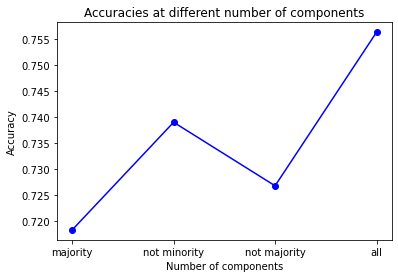

In [139]:
plt.plot(sampling_strategy, Acc_list, marker = "o", color = 'blue')
plt.title("Accuracies at different number of components")
plt.xlabel("Number of components") 
plt.ylabel("Accuracy")
plt.show()

#### Best sampling_strategy = all

In [140]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'all')
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 99, 2: 99, 3: 99, 4: 99, 5: 99, 6: 99})


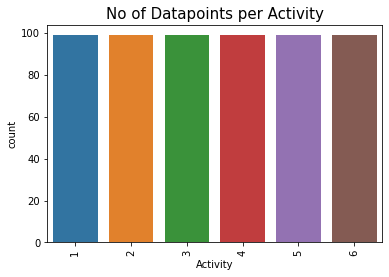

In [141]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(y_res)
plt.xticks(rotation=90)
plt.show()

In [142]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7563624024431626
F1-score [0.73413655 0.74211099 0.45557351 0.75238095 0.72672065 0.99906803]
              precision    recall  f1-score   support

           1       0.61      0.92      0.73       496
           2       0.76      0.72      0.74       471
           3       0.71      0.34      0.46       420
           4       0.71      0.80      0.75       491
           5       0.79      0.67      0.73       532
           6       1.00      1.00      1.00       537

    accuracy                           0.76      2947
   macro avg       0.76      0.74      0.73      2947
weighted avg       0.77      0.76      0.75      2947



In [ ]:
tune_model(DT, DT_params, X_train, y_train, X_test, y_test)

## Condensed Nearest Neighbor

#### Test different sampling_strategy and k_neighbors

- 'majority': resample only the majority class;

- 'not minority': resample all classes but the minority class;

- 'not majority': resample all classes but the majority class;

- 'all': resample all classes;



----------------------------
SAMPLING STRATEGY: majority


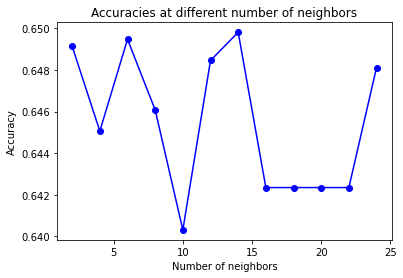


----------------------------
SAMPLING STRATEGY: not minority


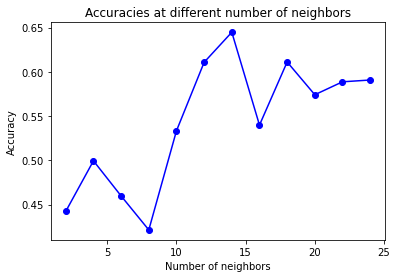


----------------------------
SAMPLING STRATEGY: not majority


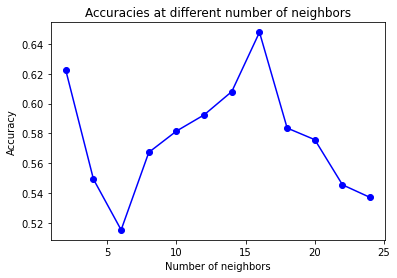


----------------------------
SAMPLING STRATEGY: all


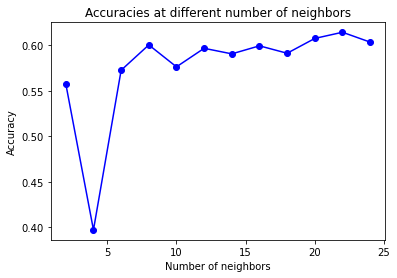

In [206]:
sampling_strategy = ['majority', 'not minority', 'not majority', 'all'] 
sqrt_features = round(math.sqrt(X_train.shape[1]))
k_neighbors = list(range(2, sqrt_features+1, 2))

for s in sampling_strategy:
    print()
    print('----------------------------')
    print('SAMPLING STRATEGY:',s)
    grid_imbalanced(CondensedNearestNeighbour,  k_neighbors, s, cnn = True)

#### Best parameters

In [212]:
import warnings
warnings.simplefilter("ignore")
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10, sampling_strategy='majority', n_neighbors = 13)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({4: 1286, 1: 1226, 2: 1073, 6: 141, 3: 99, 5: 15})


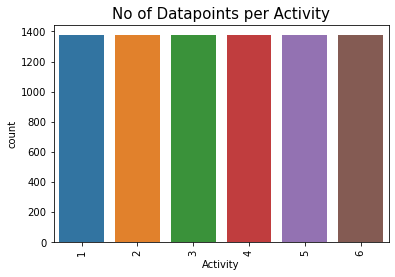

In [227]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(y_res)
plt.xticks(rotation=90)
plt.show()

In [213]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.6477774007465219
F1-score [0.71189774 0.63063063 0.42647059 0.64861111 0.17405583 0.98965193]
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       496
           2       0.51      0.82      0.63       471
           3       0.94      0.28      0.43       420
           4       0.49      0.95      0.65       491
           5       0.69      0.10      0.17       532
           6       1.00      0.98      0.99       537

    accuracy                           0.65      2947
   macro avg       0.72      0.64      0.60      2947
weighted avg       0.72      0.65      0.60      2947



# Oversampling

Due tecniche:
- Random oversampling: aumenta la classe minoritaria in maniera casuale
- SMOTE: aumenta la classe minotitaria aggiungendo punti attraverso la linea di interpolazione

## Random oversampling

#### Test different sampling_strategy

- 'minority': resample only the minority class;

- 'not minority': resample all classes but the minority class;

- 'not majority': resample all classes but the majority class;

- 'all': resample all classes;


Resampled dataset shape Counter({5: 1374, 3: 1374, 4: 1286, 1: 1226, 2: 1073, 6: 141})


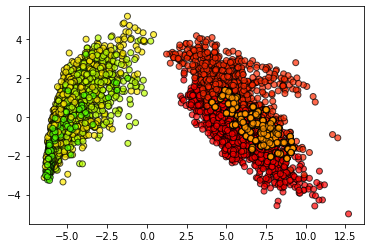

tipo di sampling_strategy: minority
---Accuracy 0.7146250424160163
---F1-score 0.6933717475528502
-------------------------
Resampled dataset shape Counter({5: 1374, 4: 1374, 1: 1374, 2: 1374, 6: 1374, 3: 99})


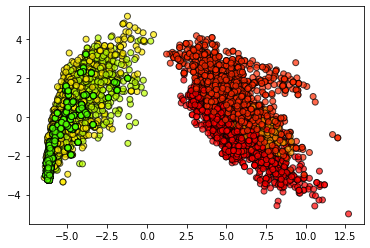

tipo di sampling_strategy: not minority
---Accuracy 0.7668815744825246
---F1-score 0.7587131865863234
-------------------------
Resampled dataset shape Counter({5: 1374, 4: 1374, 1: 1374, 2: 1374, 6: 1374, 3: 1374})


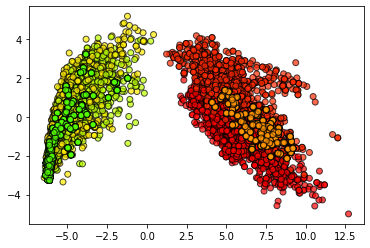

tipo di sampling_strategy: not majority
---Accuracy 0.7434679334916865
---F1-score 0.7252392598822842
-------------------------
Resampled dataset shape Counter({5: 1374, 4: 1374, 1: 1374, 2: 1374, 6: 1374, 3: 1374})


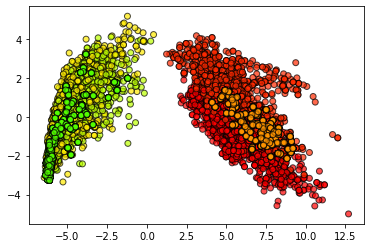

tipo di sampling_strategy: all
---Accuracy 0.7434679334916865
---F1-score 0.7252392598822842
-------------------------


In [171]:
sampling_strategy = ['minority', 'not minority', 'not majority', 'all'] 
Acc_list = []


for s in sampling_strategy:
    ros = RandomOverSampler(random_state=42, sampling_strategy=s)
    X_res, y_res = ros.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_res))
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_pca = pca.transform(X_res)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

    clf = DecisionTreeClassifier( random_state=42)
    clf.fit(X_res, y_res)

    y_pred = clf.predict(X_test)
    print('tipo di sampling_strategy: %s' % s)
    print('---Accuracy %s' % accuracy_score(y_test, y_pred))
    Acc_list.append(accuracy_score(y_test, y_pred))
    print('---F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
    print('-------------------------')
    #print(classification_report(y_test, y_pred))

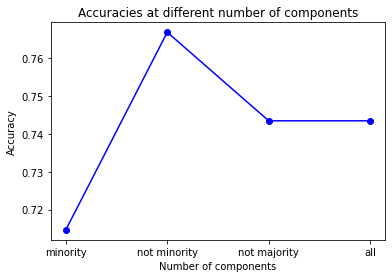

In [172]:
plt.plot(sampling_strategy, Acc_list, marker = "o", color = 'blue')
plt.title("Accuracies at different number of components")
plt.xlabel("Number of components") 
plt.ylabel("Accuracy")
plt.show()

In [173]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [233]:
ros = RandomOverSampler(random_state=42, sampling_strategy='not minority')
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({5: 1374, 4: 1374, 1: 1374, 2: 1374, 6: 1374, 3: 99})


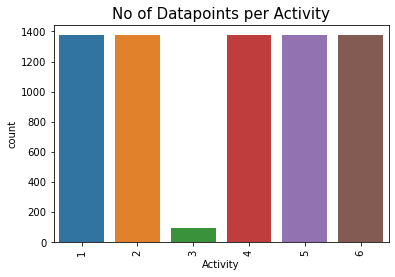

In [234]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(y_res)
plt.xticks(rotation=90)
plt.show()

In [235]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7668815744825246
F1-score [0.71057884 0.67057837 0.49050086 0.79157895 0.82041933 0.99906803]
              precision    recall  f1-score   support

           1       0.70      0.72      0.71       496
           2       0.55      0.85      0.67       471
           3       0.89      0.34      0.49       420
           4       0.82      0.77      0.79       491
           5       0.80      0.85      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.77      2947
   macro avg       0.79      0.75      0.75      2947
weighted avg       0.80      0.77      0.76      2947



## SMOTE

### Test different parameters


----------------------------
SAMPLING STRATEGY: minority


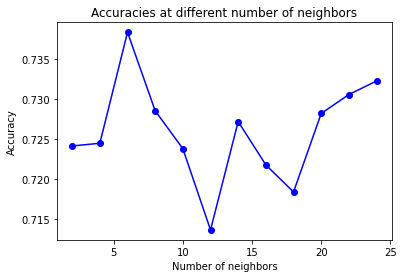


----------------------------
SAMPLING STRATEGY: not minority


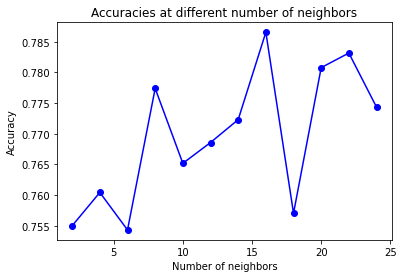


----------------------------
SAMPLING STRATEGY: not majority


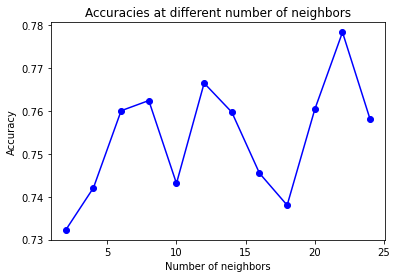


----------------------------
SAMPLING STRATEGY: all


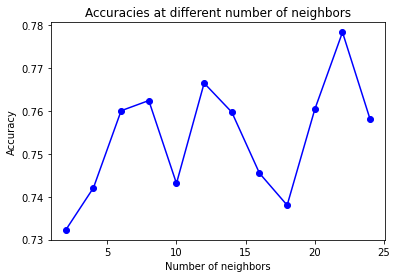

In [226]:
sampling_strategy = ['minority', 'not minority', 'not majority', 'all'] 
sqrt_features = round(math.sqrt(X_train.shape[1]))
k_neighbors = list(range(2, sqrt_features+1, 2))

for s in sampling_strategy:
    print()
    print('----------------------------')
    print('SAMPLING STRATEGY:',s)
    grid_imbalanced(SMOTE,  k_neighbors, s, cnn = False)
    
    

#### Best configuration

In [240]:
### SMOTE
sm = SMOTE(random_state=42, sampling_strategy = 'not minority', k_neighbors = 15)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({5: 1374, 4: 1374, 1: 1374, 2: 1374, 6: 1374, 3: 99})


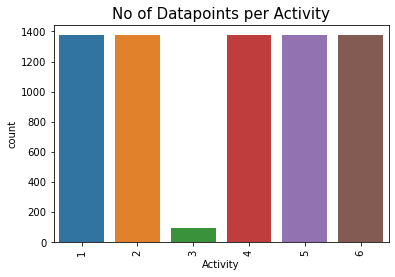

In [241]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(y_smote)
plt.xticks(rotation=90)
plt.show()

In [242]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_smote, y_smote)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8177807940278249
F1-score [0.79414456 0.75835721 0.59621451 0.82105263 0.84594348 0.99906803]
              precision    recall  f1-score   support

           1       0.73      0.88      0.79       496
           2       0.69      0.84      0.76       471
           3       0.88      0.45      0.60       420
           4       0.85      0.79      0.82       491
           5       0.82      0.87      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.82      2947
   macro avg       0.83      0.81      0.80      2947
weighted avg       0.83      0.82      0.81      2947



# Final Evaluation

Migliore oversampling = smote
- Accuracy = 0.82

Migliore undersampling = random undersampling
- Accuracy = 0.76

Milgiore tra i due = SMOTE


Fitting 3 folds for each of 126 candidates, totalling 378 fits

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

Accuracy 0.7662029182219205
F1-score 0.745516098279007
Precision: 0.7991204597595196
Recall: 0.7662029182219205
              precision    recall  f1-score   support

           1       0.62      0.84      0.72       496
           2       0.64      0.85      0.73       471
           3       0.92      0.21      0.34       420
           4       0.80      0.80      0.80       491
           5       0.81      0.82      0.82       532
           6       1.00      0.98      0.99       537

    accuracy                           0.77      2947
   macro avg       0.80      0.75      0.73      2947
weighted avg       0.80      0.77      0.75      2947


=== CROSS VALIDATION SCORES ===
Accuracy: 0.9181 (+

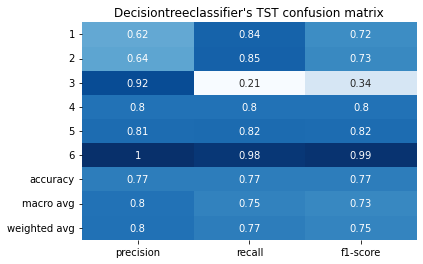

In [239]:
# Metriche per il modello finale bilanciato con SMOTE
tune_model(DT, DT_params, X_smote, y_smote, X_test, y_test)

## Caricamento dataset finale bilanciato

In [243]:
X_smote.to_csv('../data/balanced_files/X_train_balanced.csv', index=False)
y_smote.to_csv('../data/balanced_files/y_train_balanced.csv', index=False)